In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [91]:
df[['Fireplaces', 'FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
1,1,TA
2,1,TA
3,1,Gd
4,1,TA
5,0,NaN
6,1,Gd
7,2,TA
8,2,TA
9,2,TA


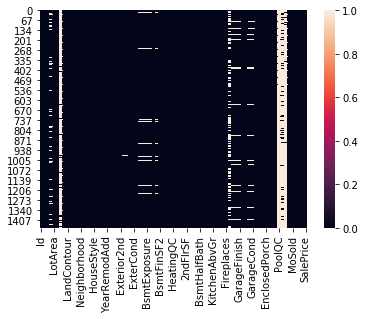

In [3]:
sns.heatmap(df.isnull())

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [76]:
total = df.isna().sum()
total =total.sort_values(ascending=False)
cols=total[total>0]
cols

FireplaceQu     690
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

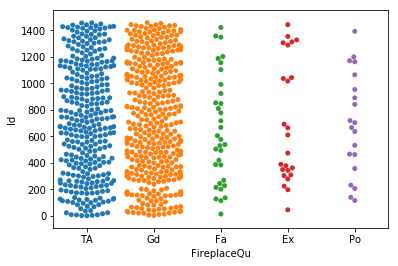

In [14]:
sns.swarmplot('FireplaceQu','Id',data=df)

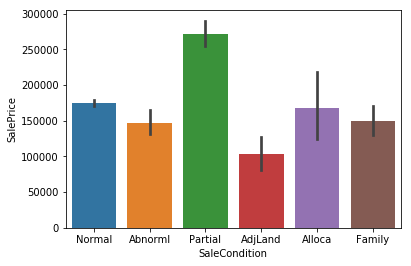

In [23]:
sns.barplot(y='SalePrice',x='SaleCondition',data=df)

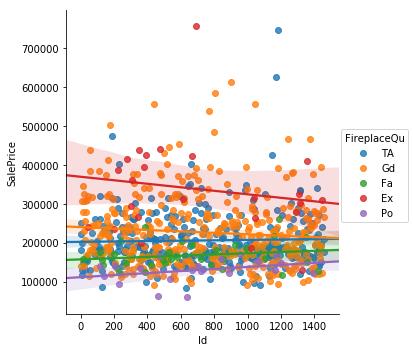

In [30]:
sns.lmplot(x='Id',y='SalePrice',data=df,hue='FireplaceQu')

In [33]:
df.isnull()['LotFrontage']=df['LotFrontage'].mean()

In [40]:
df['LotFrontage']=df.fillna(df['LotFrontage'].mean())['LotFrontage']

In [41]:
df['LotFrontage']

0        65.000000
1        80.000000
2        68.000000
3        60.000000
4        84.000000
5        85.000000
6        75.000000
7        70.049958
8        51.000000
9        50.000000
10       70.000000
11       85.000000
12       70.049958
13       91.000000
14       70.049958
15       51.000000
16       70.049958
17       72.000000
18       66.000000
19       70.000000
20      101.000000
21       57.000000
22       75.000000
23       44.000000
24       70.049958
25      110.000000
26       60.000000
27       98.000000
28       47.000000
29       60.000000
           ...    
1430     60.000000
1431     70.049958
1432     60.000000
1433     93.000000
1434     80.000000
1435     80.000000
1436     60.000000
1437     96.000000
1438     90.000000
1439     80.000000
1440     79.000000
1441     70.049958
1442     85.000000
1443     70.049958
1444     63.000000
1445     70.000000
1446     70.049958
1447     80.000000
1448     70.000000
1449     21.000000
1450     60.000000
1451     78.

In [55]:
for col in cols:
    df.isnull()[col]=df[col].mean()
    df[col]=df.fillna(df[col].mean())[col]

TypeError: must be str, not int

In [56]:
total = df.isna().sum()
total =total.sort_values(ascending=False)
cols=total[total>0][2:]
cols

GarageType      81
GarageFinish    81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64

In [75]:
plt.figure(figsize=(16,8))
sns.FacetGrid(data)

NameError: name 'data' is not defined

<Figure size 1152x576 with 0 Axes>

In [80]:
df_new=df.dropna()

In [81]:
df_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000
11,12,60,RL,85.000000,11924,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,New,Partial,345000
13,14,20,RL,91.000000,10652,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,New,Partial,279500


In [79]:
from sklearn.model_selection import train_test_split